# EDA notebook example

This notebook is used to show the functionality of the edamame package. The operations done aren't applied to replicate an optimal EDA step on the dataset  

## Table of Contents
* [Dimensions](#dim)
* [Describe distribution](#describe)
* [Column types](#col)
* [Missing](#missing)
* [Handling missing](#handle)
* [Drop columns](#drop)
* [Plot categorical variables](#plot-cat)
* [Plot numerical variables](#plot-num)
* [View cardinalities of variables](#view-card)
* [Modify the cardinalities of a variable](#mod-card)
* [Distribution study of a numerical variable](#num-study)
* [Pearson's correlation matrix](#pearson)
* [Correlation matrix for categorical columns](#cat-corr)
* [Phik Correlation matrix](#phik)
* [Interaction](#interaction)
* [Inspection](#inspection)
* [Split and scaling](#split)

In [1]:
import pandas as pd 
#from edamame import eda 
import edamame as eda
import numpy as np 
# eda version
eda.__version__

'0.31'

In [2]:
# dataset
data = pd.read_csv('/Users/marcosalvalaggio/code/python/ds/data/melb_data/melb_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Dimensions  <a class="anchor" id="dim"></a>

In [3]:
eda.dimensions(data)

Rows: 13580, Columns: 21

## Describe distribution <a class="anchor" id="describe"></a>

In [4]:
eda.describe_distribution(data)

### Quantitative columns

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### Categorical columns

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


## Column types <a class="anchor" id="col"></a>

* num_col = list with columns interpreted as quantitative/numerical by pandas
*  cat_col = list with columns interpreted as categorical ("object") by pandas

In [5]:
num_col, cat_col = eda.identify_types(data)
print(num_col)
print(cat_col)

|               | variable type   |
|:--------------|:----------------|
| Suburb        | object          |
| Address       | object          |
| Rooms         | int64           |
| Type          | object          |
| Price         | float64         |
| Method        | object          |
| SellerG       | object          |
| Date          | object          |
| Distance      | float64         |
| Postcode      | float64         |
| Bedroom2      | float64         |
| Bathroom      | float64         |
| Car           | float64         |
| Landsize      | float64         |
| BuildingArea  | float64         |
| YearBuilt     | float64         |
| CouncilArea   | object          |
| Lattitude     | float64         |
| Longtitude    | float64         |
| Regionname    | object          |
| Propertycount | float64         |

['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


# Convert a Numerical column into categorical 

In this example, the column "Rooms" is converted into categorical to show the functionality of the eda package.

In [6]:
# before
print(data['Rooms'].dtypes)
data = eda.num_to_categorical(data, col=['Rooms'])
# after
print(data['Rooms'].dtypes)

int64
object


## Missing <a class="anchor" id="missing"></a>

In [7]:
nan_num, nan_cat, zero_col = eda.missing(data)
print(nan_num) # list of numerical variables with nan values
print(nan_cat) # list of categorical variables with nan values
print(zero_col) # list of variables with 0 as values 

### INFO table

|   Row |   Col |   Rows without NaN |   Quantitative variables |   Categorical variables |
|------:|------:|-------------------:|-------------------------:|------------------------:|
| 13580 |    21 |               6196 |                       12 |                       9 |

### Check blank, null or empty values

| columns      |         % |
|:-------------|----------:|
| Car          |  0.456554 |
| BuildingArea | 47.4963   |
| YearBuilt    | 39.5803   |
| CouncilArea  | 10.081    |

### Check zeros

| columns      |          % |
|:-------------|-----------:|
| Distance     |  0.0441826 |
| Bedroom2     |  0.11782   |
| Bathroom     |  0.250368  |
| Car          |  7.55523   |
| Landsize     | 14.2784    |
| BuildingArea |  0.125184  |

### Check duplicates rows

|   % |
|----:|
|   0 |

### SUMMARY table

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
nan,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.46%,0.00%,47.50%,39.58%,10.08%,0.00%,0.00%,0.00%,0.00%
zero,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.04%,0.00%,0.12%,0.25%,7.56%,14.28%,0.13%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%




['Car', 'BuildingArea', 'YearBuilt']
['CouncilArea']
['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']


## Handling Missing <a class="anchor" id="handle"></a>

In [8]:
# quant variables
data_test = eda.handling_missing(data, col=nan_num, missing_val=np.nan, method=['mean']*len(nan_num))
# qual variables 
data_test = eda.handling_missing(data_test, col=nan_cat, missing_val=np.nan, method=['most_frequent']*len(nan_cat))
# zero variables
data_test = eda.handling_missing(data_test, col = zero_col, missing_val=0, method=['most_frequent']*len(zero_col))
# view missing data in the dataset after the handling phase 
eda.missing(data_test)

### INFO table

|   Row |   Col |   Rows without NaN |   Quantitative variables |   Categorical variables |
|------:|------:|-------------------:|-------------------------:|------------------------:|
| 13580 |    21 |              13580 |                       12 |                       9 |

### Check blank, null or empty values

| columns   | %   |
|-----------|-----|

### Check zeros

| columns   | %   |
|-----------|-----|

### Check duplicates rows

|   % |
|----:|
|   0 |

### SUMMARY table

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
nan,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
zero,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


[[], [], []]

As you can see from the result of the missing function, all the missing values it's been treated 

## Drop columns <a class="anchor" id="drop"></a>

In [9]:
eda.dimensions(data_test)
data_test = eda.drop_columns(data_test, col=['CouncilArea', 'Date'])
eda.dimensions(data_test)

Rows: 13580, Columns: 21

Rows: 13580, Columns: 19

## Plot categorical variables <a class="anchor" id="plot-cat"></a>

In [10]:
num_col, cat_col = eda.identify_types(data_test)
print(num_col)
print(cat_col)

|               | variable type   |
|:--------------|:----------------|
| Suburb        | object          |
| Address       | object          |
| Rooms         | object          |
| Type          | object          |
| Price         | float64         |
| Method        | object          |
| SellerG       | object          |
| Distance      | float64         |
| Postcode      | float64         |
| Bedroom2      | float64         |
| Bathroom      | float64         |
| Car           | float64         |
| Landsize      | float64         |
| BuildingArea  | float64         |
| YearBuilt     | float64         |
| Lattitude     | float64         |
| Longtitude    | float64         |
| Regionname    | object          |
| Propertycount | float64         |

['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname']


### Suburb

,Suburb
count,13580
unique,314
top,Reservoir
freq,359
,Suburb
Reservoir,359
Richmond,260
Bentleigh East,249
Preston,239
Brunswick,222


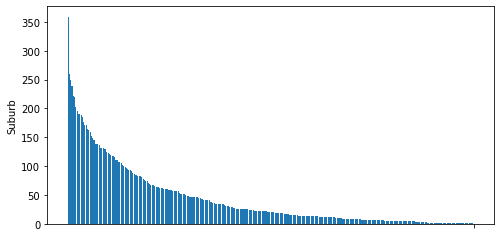

### Address

,Address
count,13580
unique,13378
top,36 Aberfeldie St
freq,3
,Address
36 Aberfeldie St,3
2 Bruce St,3
5 Charles St,3
53 William St,3
14 Arthur St,3


***too many unique values***

### Rooms

,Rooms
count,13580
unique,9
top,3
freq,5881
,Rooms
3,5881
2,3648
4,2688
1,681
5,596


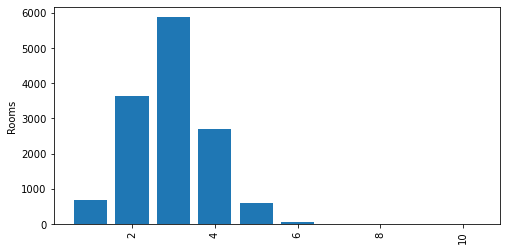

### Type

,Type
count,13580
unique,3
top,h
freq,9449
,Type
h,9449
u,3017
t,1114


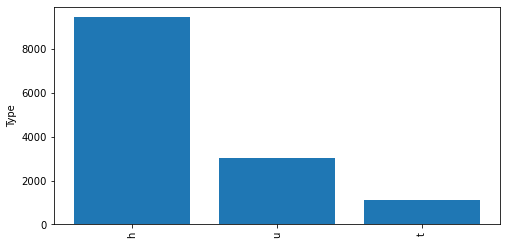

### Method

,Method
count,13580
unique,5
top,S
freq,9022
,Method
S,9022
SP,1703
PI,1564
VB,1199
SA,92


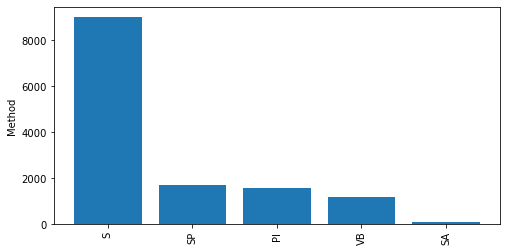

### SellerG

,SellerG
count,13580
unique,268
top,Nelson
freq,1565
,SellerG
Nelson,1565
Jellis,1316
hockingstuart,1167
Barry,1011
Ray,701


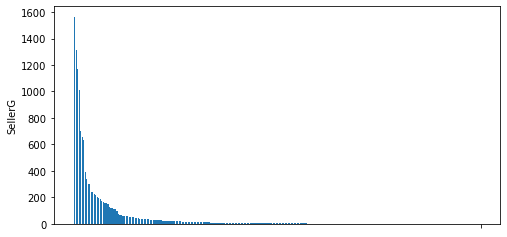

### Regionname

,Regionname
count,13580
unique,8
top,Southern Metropolitan
freq,4695
,Regionname
Southern Metropolitan,4695
Northern Metropolitan,3890
Western Metropolitan,2948
Eastern Metropolitan,1471
South-Eastern Metropolitan,450


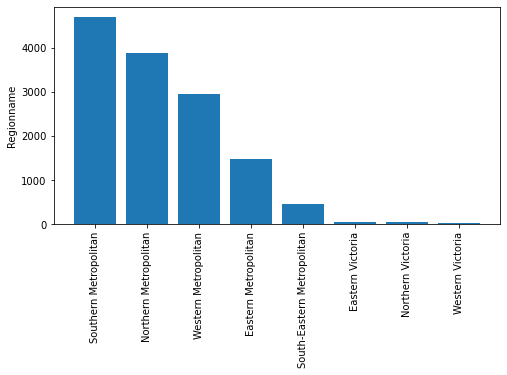

In [11]:
eda.plot_categorical(data_test, cat_col)

As you can see from the result obtained by the **plot_categoriacal** function, some variables (SellerG, Address and Suburb) show too many unique values to be well-fitted by a model in a future implementation. It's necessary modifying the cardinality of the variables (edamame has the **modify_cadinality** function for this scope that will be presented during the notebook) or drops those variables.

In [12]:
# drop address columns far too many unique values 
data_test = eda.drop_columns(data_test, col=['Address'])
eda.dimensions(data_test)

Rows: 13580, Columns: 18

## Plot numerical variables <a class="anchor" id="plot-num"></a>

In [13]:
print(num_col)

['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


### Price

,Price
count,13580.000000
mean,1075684.079455
std,639310.724296
min,85000.000000
25%,650000.000000
50%,903000.000000
75%,1330000.000000
max,9000000.000000
unique,2204.000000
skew,2.239624


<Figure size 576x288 with 0 Axes>

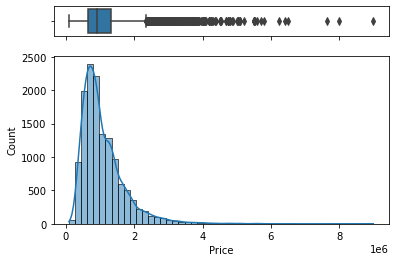

### Distance

,Distance
count,13580.000000
mean,10.142725
std,5.864895
min,0.700000
25%,6.200000
50%,9.200000
75%,13.000000
max,48.100000
unique,201.000000
skew,1.679978


<Figure size 576x288 with 0 Axes>

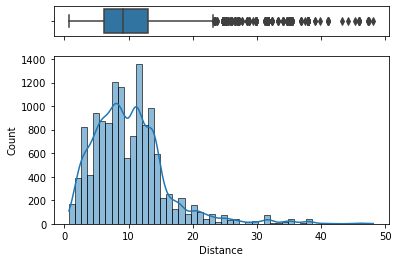

### Postcode

,Postcode
count,13580.000000
mean,3105.301915
std,90.676964
min,3000.000000
25%,3044.000000
50%,3084.000000
75%,3148.000000
max,3977.000000
unique,198.000000
skew,4.076152


<Figure size 576x288 with 0 Axes>

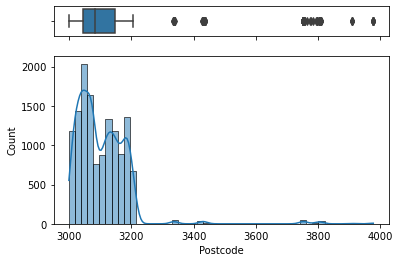

### Bedroom2

,Bedroom2
count,13580.000000
mean,2.918262
std,0.960723
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,20.000000
unique,11.000000
skew,0.808585


<Figure size 576x288 with 0 Axes>

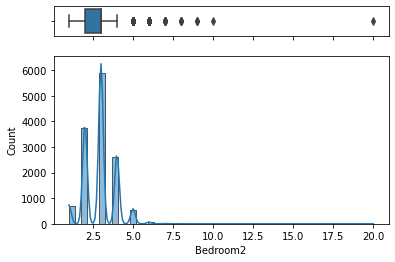

### Bathroom

,Bathroom
count,13580.000000
mean,1.536745
std,0.687953
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000
unique,8.000000
skew,1.415789


<Figure size 576x288 with 0 Axes>

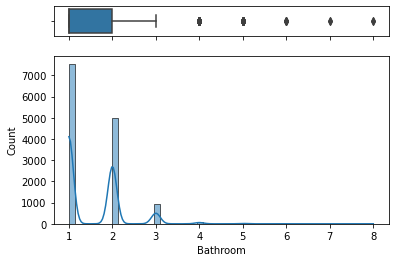

### Car

,Car
count,13580.000000
mean,1.761180
std,0.845703
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,10.000000
unique,11.000000
skew,1.997825


<Figure size 576x288 with 0 Axes>

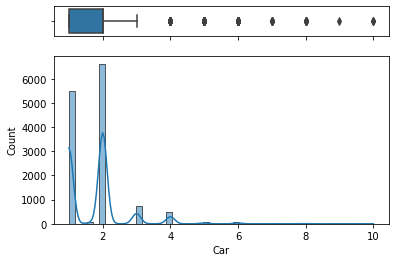

### Landsize

,Landsize
count,13580.000000
mean,651.225405
std,3984.155775
min,1.000000
25%,305.000000
50%,585.000000
75%,651.000000
max,433014.000000
unique,1447.000000
skew,95.635747


<Figure size 576x288 with 0 Axes>

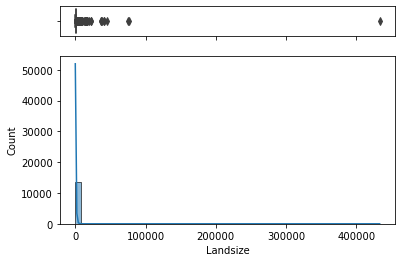

### BuildingArea

,BuildingArea
count,13580.000000
mean,152.157889
std,391.966036
min,1.000000
25%,122.707500
50%,151.967650
75%,151.967650
max,44515.000000
unique,602.000000
skew,107.238957


<Figure size 576x288 with 0 Axes>

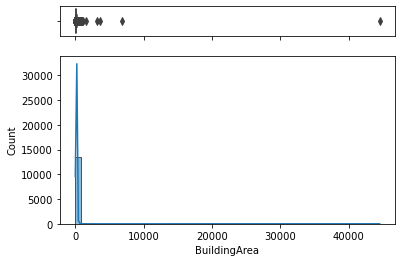

### YearBuilt

,YearBuilt
count,13580.000000
mean,1964.684217
std,28.972246
min,1196.000000
25%,1960.000000
50%,1964.684217
75%,1975.000000
max,2018.000000
unique,145.000000
skew,-1.982715


<Figure size 576x288 with 0 Axes>

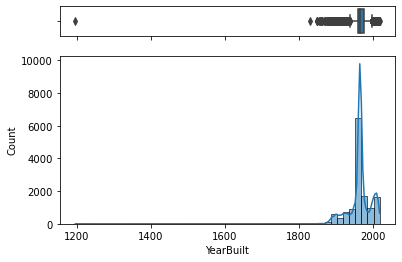

### Lattitude

,Lattitude
count,13580.000000
mean,-37.809203
std,0.079260
min,-38.182550
25%,-37.856822
50%,-37.802355
75%,-37.756400
max,-37.408530
unique,6503.000000
skew,-0.426695


<Figure size 576x288 with 0 Axes>

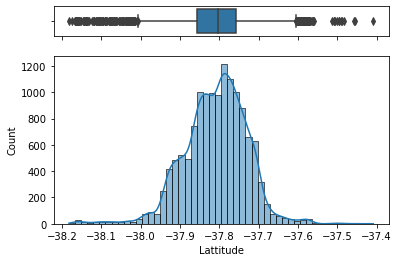

### Longtitude

,Longtitude
count,13580.000000
mean,144.995216
std,0.103916
min,144.431810
25%,144.929600
50%,145.000100
75%,145.058305
max,145.526350
unique,7063.000000
skew,-0.210991


<Figure size 576x288 with 0 Axes>

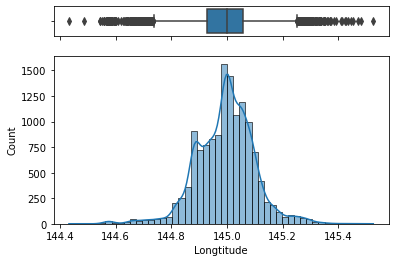

### Propertycount

,Propertycount
count,13580.000000
mean,7454.417378
std,4378.581772
min,249.000000
25%,4380.000000
50%,6555.000000
75%,10331.000000
max,21650.000000
unique,311.000000
skew,1.069339


<Figure size 576x288 with 0 Axes>

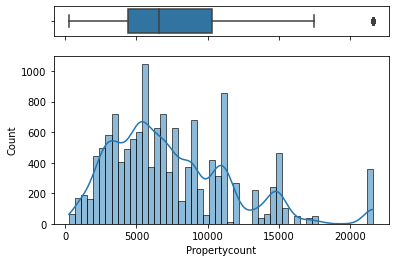

In [14]:
eda.plot_numerical(data_test, num_col)

As you can see from the result obtained by the **plot_quantitative** function, some variables (Rooms, Bedroom2, Bathroom, Car) can be treated as categorical. For this purpose, you can apply the function **num_to _categorical**. In addition, some variables present a high level of skewness and for a model fitting purpose we need to apply transformations to obtain more information from the skewed variables  (edamame has the **num_variable_study** function for this scope that will be presented during the notebook).

## View cardinalities of variables <a class="anchor" id="view-card"></a>

In [15]:
eda.dimensions(data_test)
num_col, cat_col = eda.identify_types(data_test)
print(f'Numerical variables: {num_col}')
print(f'Categorical variables: {cat_col}')

Rows: 13580, Columns: 18

|               | variable type   |
|:--------------|:----------------|
| Suburb        | object          |
| Rooms         | object          |
| Type          | object          |
| Price         | float64         |
| Method        | object          |
| SellerG       | object          |
| Distance      | float64         |
| Postcode      | float64         |
| Bedroom2      | float64         |
| Bathroom      | float64         |
| Car           | float64         |
| Landsize      | float64         |
| BuildingArea  | float64         |
| YearBuilt     | float64         |
| Lattitude     | float64         |
| Longtitude    | float64         |
| Regionname    | object          |
| Propertycount | float64         |

Numerical variables: ['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
Categorical variables: ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname']


shown just the cardinalities of the categorical variables

In [16]:
eda.view_cardinality(data_test, col=cat_col)

| columns    |   cardinality |
|:-----------|--------------:|
| Suburb     |           314 |
| Rooms      |             9 |
| Type       |             3 |
| Method     |             5 |
| SellerG    |           268 |
| Regionname |             8 |

In this case, the variables; Suburb, SellerG and Date present high cardinalities values. We need to reduce these values or drop the variable.

## Modify the cardinalities of a variable <a class="anchor" id="mod-card"></a>

We need to modify the cardinalities of the variables:
 
* SellerG 
* Suburb

In [17]:
data_test = eda.modify_cardinality(data_test, col=['SellerG','Suburb'], threshold=[400,200])

| columns   |   old_cardinalities |   new_cardinalities |
|:----------|--------------------:|--------------------:|
| SellerG   |                 268 |                   8 |
| Suburb    |                 314 |                   8 |

In [18]:
eda.view_cardinality(data_test, col=cat_col)

| columns    |   cardinality |
|:-----------|--------------:|
| Suburb     |             8 |
| Rooms      |             9 |
| Type       |             3 |
| Method     |             5 |
| SellerG    |             8 |
| Regionname |             8 |

## Distribution study of a numerical variable <a class="anchor" id="num-study"></a>

In this example, we study the response variable "Price", which has a right-skewed distribution

## Strickt positive variable

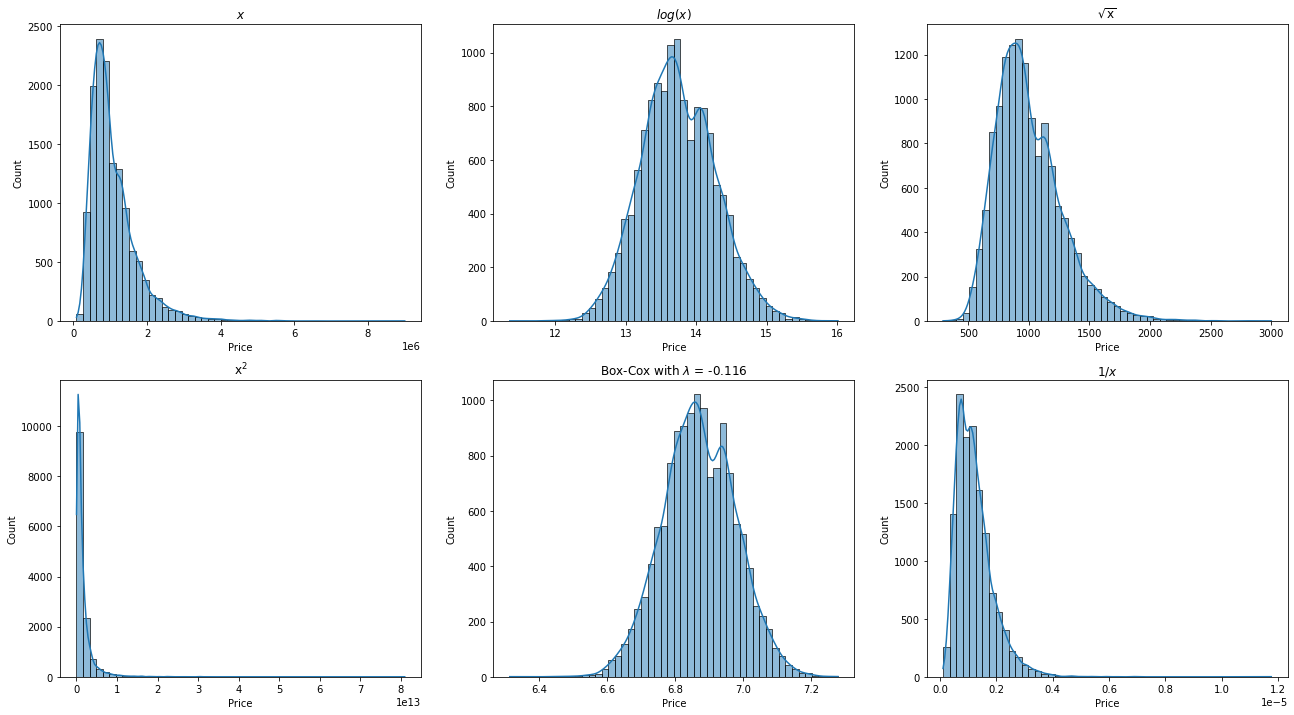

## Effects of transformations:

### log transformation

* positive effect on right-skewed distributions and de-emphasize outliers

* gets worse when applied to distributions left-skewed or already normal

### Square root transformation

* normalizing effect on right-skewed distributions, it is weaker than the logarithm and cube root

* variables with a left skew will become worst after a square root transformation.

* high values get compressed and low values become more spread out

### Square transformation

* used to reduce left skewness

* gets worse when applied to distributions without skewness

### Box-Cox

* if $\lambda$ is a non-zero number, then the transformed variable may be more difficult to interpret than if we simply applied a log transform.

* works well for left and right skewness

* only works for positive data

### Reciprocal

* It can not be applied to zero values

* The reciprocal reverses order among values of the same sign: largestbecomes smallest, etc.

In [19]:
eda.num_variable_study(data_test, col='Price', theory=True)

## Pearson correlation <a class="anchor" id="pearson"></a>
Correlation matrix between numeric columns only 

In [20]:
eda.correlation_pearson(data_test)

### Pearson's correlation matrix

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Price,1.000000,-0.163162,0.107867,0.478264,0.468559,0.271963,0.021849,0.069860,-0.262144,-0.212934,0.203656,-0.042153
Distance,-0.163162,1.000000,0.430816,0.296496,0.125810,0.185808,0.010131,0.074067,0.193870,-0.130838,0.239317,-0.053011
Postcode,0.107867,0.430816,1.000000,0.060555,0.114516,0.038879,0.025420,0.040788,0.025406,-0.406104,0.445357,0.062304
Bedroom2,0.478264,0.296496,0.060555,1.000000,0.586507,0.381485,0.002836,0.089876,-0.041711,0.015869,0.102947,-0.081055
Bathroom,0.468559,0.125810,0.114516,0.586507,1.000000,0.272867,0.027220,0.085134,0.121518,-0.071730,0.120019,-0.052112
Car,0.271963,0.185808,0.038879,0.381485,0.272867,1.000000,0.006587,0.070674,-0.043050,-0.002018,0.035562,-0.027853
Landsize,0.021849,0.010131,0.025420,0.002836,0.027220,0.006587,1.000000,0.092614,0.014425,0.005079,0.009157,-0.002682
BuildingArea,0.069860,0.074067,0.040788,0.089876,0.085134,0.070674,0.092614,1.000000,0.003337,0.031947,-0.017238,-0.020678
YearBuilt,-0.262144,0.193870,0.025406,-0.041711,0.121518,-0.043050,0.014425,0.003337,1.000000,0.046938,-0.002672,0.004909
Lattitude,-0.212934,-0.130838,-0.406104,0.015869,-0.071730,-0.002018,0.005079,0.031947,0.046938,1.000000,-0.357634,0.047086


In [21]:
eda.correlation_pearson(data_test, threshold=0.7)

### Pearson's correlation matrix

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postcode,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bedroom2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bathroom,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Car,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Landsize,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
BuildingArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Lattitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


## 

## Correlation matrix for categorical columns <a class="anchor" id="cat-corr"></a>

In [22]:
eda.correlation_categorical(data_test)

### $\chi^2$ test statistic $p$-values

,Method,Regionname,Rooms,SellerG,Suburb,Type
Method,nan,0.000000,0.000000,0.000000,0.000000,0.000000
Regionname,0.000000,nan,0.000000,0.000000,0.000000,0.000000
Rooms,0.000000,0.000000,nan,0.000000,0.000000,0.000000
SellerG,0.000000,0.000000,0.000000,nan,0.000000,0.000000
Suburb,0.000000,0.000000,0.000000,0.000000,nan,0.000000
Type,0.000000,0.000000,0.000000,0.000000,0.000000,nan


All the variables show a significant p-value against the H0 of the chisq test.

## $\phi_k$ Correlation matrix <a class="anchor" id="phik"></a>

In [23]:
eda.correlation_phik(data_test, theory=True)

### $\phi_K$ correlation matrix

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
Suburb,1.0,0.13,0.19,0.12,0.041,0.42,0.44,0.4,0.12,0.12,0.089,0.0,0.0,0.13,0.43,0.33,0.56,0.8
Rooms,0.13,1.0,0.75,0.37,0.13,0.12,0.27,0.12,0.91,0.53,0.34,0.0,0.044,0.12,0.17,0.22,0.19,0.14
Type,0.19,0.75,1.0,0.45,0.086,0.16,0.29,0.16,0.74,0.33,0.44,0.0,0.0,0.4,0.25,0.23,0.24,0.21
Price,0.12,0.37,0.45,1.0,0.15,0.29,0.2,0.26,0.35,0.45,0.33,0.0056,0.0,0.33,0.35,0.32,0.29,0.23
Method,0.041,0.13,0.086,0.15,1.0,0.11,0.16,0.11,0.075,0.1,0.05,0.018,0.0,0.013,0.14,0.17,0.13,0.1
SellerG,0.42,0.12,0.16,0.29,0.11,1.0,0.34,0.51,0.11,0.16,0.077,0.0,0.0,0.22,0.48,0.34,0.59,0.27
Distance,0.44,0.27,0.29,0.2,0.16,0.34,1.0,0.73,0.29,0.14,0.26,0.18,0.28,0.29,0.9,0.83,0.73,0.56
Postcode,0.4,0.12,0.16,0.26,0.11,0.51,0.73,1.0,0.088,0.19,0.088,0.13,0.15,0.079,0.73,0.76,0.91,0.39
Bedroom2,0.12,0.91,0.74,0.35,0.075,0.11,0.29,0.088,1.0,0.58,0.38,0.0,0.05,0.057,0.17,0.22,0.18,0.13
Bathroom,0.12,0.53,0.33,0.45,0.1,0.16,0.14,0.19,0.58,1.0,0.32,0.017,0.0076,0.0,0.12,0.14,0.21,0.1


* the calculation of $\phi_K$ is computationally expensive

* no indication of direction

* no closed-form formula

* when working with numeric-only variables, other correlation coefficients will be more precise, especially for small samples.

* it is based on several refinements to Pearson’s $\chi^2$ contingency test

## Interaction <a class="anchor" id="interaction"></a>

In [24]:
eda.interaction(data_test)

interactive(children=(Dropdown(description='column1', options=('Price', 'Distance', 'Postcode', 'Bedroom2', 'B…

## Inspection <a class="anchor" id="inspection"></a>

In [25]:
eda.inspection(data_test)

interactive(children=(Dropdown(description='column', options=('Suburb', 'Rooms', 'Type', 'Price', 'Method', 'S…

## Split and scaling <a class="anchor" id="split"></a>

In [27]:
X, y = eda.split_and_scaling(data = data_test, target='Price')
print(X.shape)
display(X.head())
print(y.shape)
display(y.head())

(13580, 17)


,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,Other,2,h,S,Other,-1.303179,-0.422415,-0.955838,-0.780235,-0.900089,-0.112757,-0.000485,0.000000,0.121160,0.030640,Northern Metropolitan,-0.784625
1,Other,2,h,S,Other,-1.303179,-0.422415,-0.955838,-0.780235,0.282403,-0.124303,-0.186650,-2.232709,0.016437,-0.017478,Northern Metropolitan,-0.784625
2,Other,3,h,SP,Other,-1.303179,-0.422415,0.085083,0.673406,0.282403,-0.129825,-0.005505,-2.232709,-0.001227,-0.007855,Northern Metropolitan,-0.784625
3,Other,3,h,PI,Other,-1.303179,-0.422415,0.085083,0.673406,-0.900089,-0.139865,-0.000485,0.000000,0.155226,0.016204,Northern Metropolitan,-0.784625
4,Other,4,h,VB,Nelson,-1.303179,-0.422415,0.085083,-0.780235,0.282403,-0.133339,-0.025916,1.702236,0.025269,-0.010742,Northern Metropolitan,-0.784625


(13580,)


0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

## Save the datasets

In [28]:
X.to_csv('X.csv', index=False, sep=';')
y.to_csv('y.csv', index=False, sep=';')